In [9]:
install.packages("http://www.bnlearn.com/releases/bnlearn_latest.tar.gz", repos = NULL)
library('bnlearn')

Dataset coronary (coronaire)

|Nom|Description|Valeur possible|
|---|---|---|
|Smoking|Fumeur|yes, no|
|M. Work|travail mental ardu|yes, no|
|P. Work|travail physique pénible|yes, no|
|Pressure|pression artérielle systolique|<140, >140|
|Proteins|rapport des lipoprotéines bêta et alpha|<3, >3|
|Family|historique familiale de maladie coronarienne|neg, pos|

In [2]:
data(coronary)
bn_df <- data.frame(coronary)
head(coronary)

Smoking,M. Work,P. Work,Pressure,Proteins,Family
no,no,no,<140,<3,neg
no,no,no,<140,<3,neg
no,no,no,<140,<3,neg
no,no,no,<140,<3,neg
no,no,no,<140,<3,neg
no,no,no,<140,<3,neg


In [3]:
summary(coronary)

 Smoking   M. Work    P. Work   Pressure    Proteins  Family    
 no :961   no :1130   no :927   <140:1054   <3:1061   neg:1581  
 yes:880   yes: 711   yes:914   >140: 787   >3: 780   pos: 260  

In [4]:
# Trouver la structure du graph avec un algorithm nommé "max-min hill climbing"
res <- hc(bn_df)
res


  Bayesian network learned via Score-based methods

  model:
   [Smoking][P..Work|Smoking][Pressure|Smoking]
   [M..Work|Smoking:P..Work:Pressure][Proteins|Smoking:M..Work][Family|M..Work]
  nodes:                                 6 
  arcs:                                  8 
    undirected arcs:                     0 
    directed arcs:                       8 
  average markov blanket size:           3.00 
  average neighbourhood size:            2.67 
  average branching factor:              1.33 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (disc.) 
  penalization coefficient:              3.759032 
  tests used in the learning procedure:  65 
  optimized:                             TRUE 


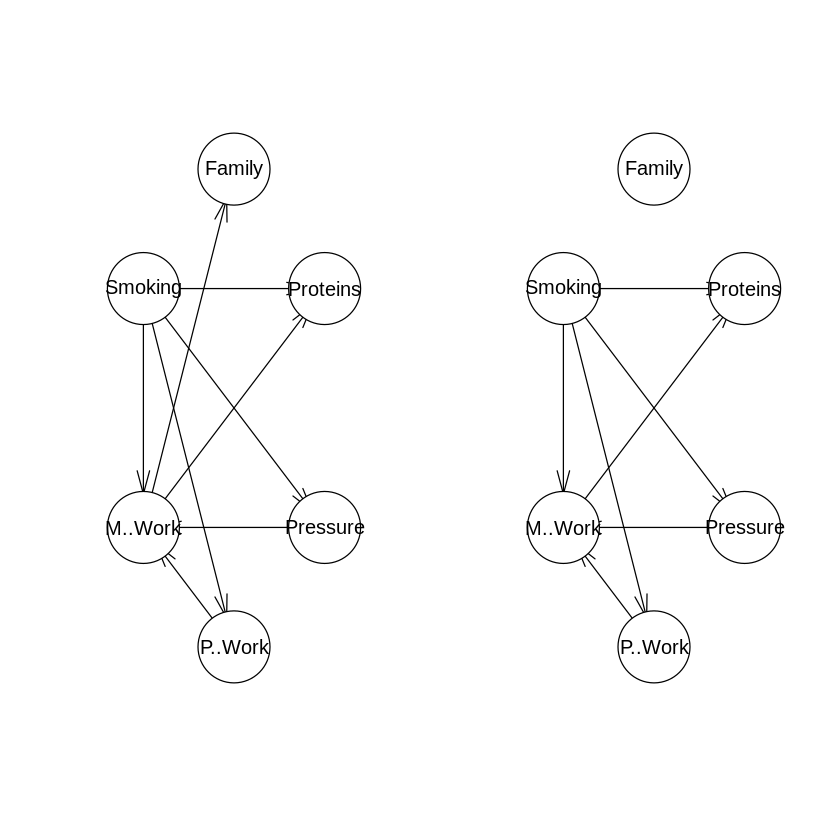

In [5]:
# Affichage du graph
par(mfrow=c(1,2)) 
plot(res)

# Retirer l'arc entre Family et M..Work car cela ne fait pas de sens.
res$arcs <- res$arcs[-which((res$arcs[,'from'] == "M..Work" & res$arcs[,'to'] == "Family")),]
# Reafficher
plot(res)

In [6]:
fittedbn <- bn.fit(res, data = bn_df)

Les tables de probabilités d'un noeud (ici M..Work)

In [7]:
fittedbn$M..Work


  Parameters of node M..Work (multinomial distribution)

Conditional probability table:
 
, , P..Work = no, Pressure = <140

       Smoking
M..Work        no       yes
    no  0.2668919 0.6260504
    yes 0.7331081 0.3739496

, , P..Work = yes, Pressure = <140

       Smoking
M..Work        no       yes
    no  0.8995434 0.8571429
    yes 0.1004566 0.1428571

, , P..Work = no, Pressure = >140

       Smoking
M..Work        no       yes
    no  0.2745902 0.2684564
    yes 0.7254098 0.7315436

, , P..Work = yes, Pressure = >140

       Smoking
M..Work        no       yes
    no  0.8861386 0.8385417
    yes 0.1138614 0.1614583


In [8]:
# Probabilité que proteins soit < 3 si pas fumeur
cpquery(fittedbn, 
        event = (Proteins=="<3"), 
        evidence = (Smoking=="no"))

# Probabilité que proteins soit < 3 si pas fumeur et a une pression de > 140
cpquery(fittedbn, 
        event = (Proteins=="<3"), 
        evidence = (Smoking=="no" & Pressure==">140"))

# Probabilité que pressure soit > 140 si proteins est < 3
cpquery(fittedbn, 
        event = (Pressure==">140"), 
        evidence = (Proteins=="<3"))

[1] 0.6135489

[1] 0.6153846

[1] 0.4318572